In [13]:
import sklearn
from sklearn.decomposition import TruncatedSVD, NMF
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import Normalizer
from sklearn import metrics
from sklearn.cluster import KMeans, MiniBatchKMeans
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import json, csv
import math, re
from scipy import sparse

In [14]:
example = ["Machine learning is super fun",
"Python is super super cool",
"Statistics is cool too",
"Data science is fun",
"Python is great for machine learning",
"I like football",
"Football is great to watch"]
vectorizer = CountVectorizer(stop_words = 'english', ngram_range=(1,1))
dtm = vectorizer.fit_transform(example)
pd.DataFrame(dtm.toarray(),index=example,columns=vectorizer.get_feature_names())

,cool,data,football,fun,great,learning,like,machine,python,science,statistics,super,watch
Machine learning is super fun,0,0,0,1,0,1,0,1,0,0,0,1,0
Python is super super cool,1,0,0,0,0,0,0,0,1,0,0,2,0
Statistics is cool too,1,0,0,0,0,0,0,0,0,0,1,0,0
Data science is fun,0,1,0,1,0,0,0,0,0,1,0,0,0
Python is great for machine learning,0,0,0,0,1,1,0,1,1,0,0,0,0
I like football,0,0,1,0,0,0,1,0,0,0,0,0,0
Football is great to watch,0,0,1,0,1,0,0,0,0,0,0,0,1


In [15]:
def create_cooccurrence_matrix(filename, dictionary):
    vocabulary={token: pos for pos, token in enumerate(dictionary)}
    data=[]
    row=[]
    col=[]
    for sentence in filename:
        sentence=sentence.lower()
        sentence=sentence.split()
        tokens=[token for token in sentence if token!=u"" and token in list(dictionary.keys())]
        for pos,token in enumerate(tokens):
            i=vocabulary.setdefault(token,len(vocabulary))
            start=0
            end=len(tokens)
            for pos2 in range(start,end,1):
                if pos2==pos: 
                    continue
                j=vocabulary.setdefault(tokens[pos2],len(vocabulary))
                data.append(1.); row.append(i); col.append(j);
    cooccurrence_matrix=sparse.coo_matrix((data,(row,col)))
    return cooccurrence_matrix

In [16]:
M = create_cooccurrence_matrix(example, {name: list([]) for name  in vectorizer.get_feature_names()})

In [17]:
pd.DataFrame(M.toarray(),index=vectorizer.get_feature_names(),columns=vectorizer.get_feature_names())

,cool,data,football,fun,great,learning,like,machine,python,science,statistics,super,watch
cool,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,2.0,0.0
data,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
football,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
fun,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
great,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
learning,0.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0,1.0,0.0
like,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
machine,0.0,0.0,0.0,1.0,1.0,2.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
python,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0
science,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
ETM = dtm.toarray() @ np.transpose(M.toarray())

In [19]:
pd.DataFrame(ETM,index=example,columns=vectorizer.get_feature_names())

,cool,data,football,fun,great,learning,like,machine,python,science,statistics,super,watch
Machine learning is super fun,2.0,1.0,0.0,3.0,2.0,4.0,0.0,4.0,4.0,1.0,0.0,5.0,0.0
Python is super super cool,5.0,0.0,0.0,2.0,1.0,3.0,0.0,3.0,5.0,0.0,1.0,8.0,0.0
Statistics is cool too,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,2.0,0.0
Data science is fun,0.0,2.0,0.0,2.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,1.0,0.0
Python is great for machine learning,1.0,0.0,1.0,2.0,3.0,4.0,0.0,4.0,3.0,0.0,0.0,4.0,1.0
I like football,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
Football is great to watch,0.0,0.0,2.0,0.0,2.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,2.0


In [20]:
etm = np.array(dtm.toarray(), dtype='d')

In [49]:
# Fit LSA. Use algorithm = “randomized” for large datasets
lsa = NMF(2,beta_loss='kullback-leibler', solver='mu', max_iter=1000, alpha=1,
          l1_ratio=1)
dtm_lsa = lsa.fit_transform(ETM)
dtm_lsa = Normalizer(copy=False).fit_transform(dtm_lsa)

In [50]:
pd.DataFrame(lsa.components_,index = ["component_1","component_2"],columns = vectorizer.get_feature_names())

,cool,data,football,fun,great,learning,like,machine,python,science,statistics,super,watch
component_1,0.905301,0.301767,0.000000,0.905301,0.467599,1.223580,0.000000,1.223580,1.408246,0.301767,0.201178,2.01178,0.000000
component_2,0.000000,0.000000,0.882186,0.000000,0.959684,0.184344,0.441093,0.184344,0.000000,0.000000,0.000000,0.00000,0.882186


In [51]:
components = np.transpose(lsa.components_)
components = sklearn.preprocessing.normalize(components, axis=1, norm='l2')

In [52]:
Vxs = [w[0] for w in components]
Vys = [w[1] for w in components]
Vxs, Vys

([1.0,
  1.0,
  0.0,
  1.0,
  0.43801544639791423,
  0.9888405198304743,
  0.0,
  0.9888405198304743,
  1.0,
  1.0,
  1.0,
  1.0,
  0.0],
 [0.0,
  0.0,
  1.0,
  0.0,
  0.8989674458604359,
  0.14897793910978105,
  1.0,
  0.14897793910978105,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0])

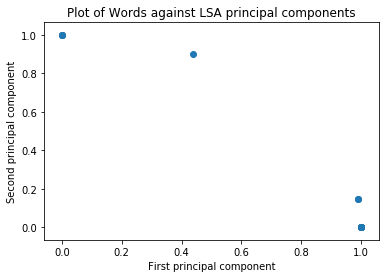

In [25]:
plt.figure()
plt.scatter(Vxs,Vys)
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.title('Plot of Words against LSA principal components')
plt.show()

Populating the interactive namespace from numpy and matplotlib


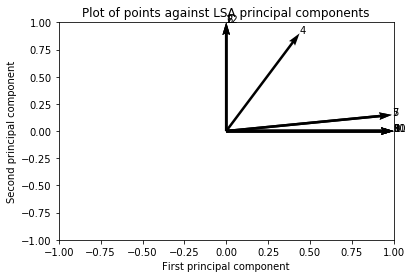

[(0, 'cool'), (1, 'data'), (2, 'football'), (3, 'fun'), (4, 'great'), (5, 'learning'), (6, 'like'), (7, 'machine'), (8, 'python'), (9, 'science'), (10, 'statistics'), (11, 'super'), (12, 'watch')]


In [26]:
%pylab inline
plt.figure()
ax = plt.gca()
for pos, vec in enumerate(list(zip(Vxs, Vys))):
    ax.quiver(0,0,vec[0],vec[1],angles='xy',scale_units='xy',scale=1, linewidth = .01, norm=True)
    ax.annotate('{}'.format(pos),xy=(vec[0], vec[1]),xytext=(vec[0], vec[1]))
ax.set_xlim([-1,1])
ax.set_ylim([-1,1])
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.title('Plot of points against LSA principal components')
plt.draw()
plt.show()
print(list(enumerate(vectorizer.get_feature_names())))

In [27]:
#Compute vectors similarity using LSA components
Vsimilarity = np.asarray(numpy.asmatrix(components) * numpy.asmatrix(components).T)
pd.DataFrame(Vsimilarity,index=vectorizer.get_feature_names(), columns=vectorizer.get_feature_names())

,cool,data,football,fun,great,learning,like,machine,python,science,statistics,super,watch
cool,1.000000,1.000000,0.000000,1.000000,0.438015,0.988841,0.000000,0.988841,1.000000,1.000000,1.000000,1.000000,0.000000
data,1.000000,1.000000,0.000000,1.000000,0.438015,0.988841,0.000000,0.988841,1.000000,1.000000,1.000000,1.000000,0.000000
football,0.000000,0.000000,1.000000,0.000000,0.898967,0.148978,1.000000,0.148978,0.000000,0.000000,0.000000,0.000000,1.000000
fun,1.000000,1.000000,0.000000,1.000000,0.438015,0.988841,0.000000,0.988841,1.000000,1.000000,1.000000,1.000000,0.000000
great,0.438015,0.438015,0.898967,0.438015,1.000000,0.567054,0.898967,0.567054,0.438015,0.438015,0.438015,0.438015,0.898967
learning,0.988841,0.988841,0.148978,0.988841,0.567054,1.000000,0.148978,1.000000,0.988841,0.988841,0.988841,0.988841,0.148978
like,0.000000,0.000000,1.000000,0.000000,0.898967,0.148978,1.000000,0.148978,0.000000,0.000000,0.000000,0.000000,1.000000
machine,0.988841,0.988841,0.148978,0.988841,0.567054,1.000000,0.148978,1.000000,0.988841,0.988841,0.988841,0.988841,0.148978
python,1.000000,1.000000,0.000000,1.000000,0.438015,0.988841,0.000000,0.988841,1.000000,1.000000,1.000000,1.000000,0.000000
science,1.000000,1.000000,0.000000,1.000000,0.438015,0.988841,0.000000,0.988841,1.000000,1.000000,1.000000,1.000000,0.000000


In [28]:
pd.DataFrame(dtm_lsa, index = example, columns = ["component_" + str(i) for i in range(1,lsa.n_components_+1,1)])

,component_1,component_2
Machine learning is super fun,1.000000e+00,2.356882e-11
Python is super super cool,1.000000e+00,0.000000e+00
Statistics is cool too,1.000000e+00,0.000000e+00
Data science is fun,1.000000e+00,1.417265e-29
Python is great for machine learning,9.092389e-01,4.162748e-01
I like football,1.886950e-38,1.000000e+00
Football is great to watch,1.094385e-01,9.939936e-01


In [29]:
xs = [w[0] for w in dtm_lsa]
ys = [w[1] for w in dtm_lsa]
xs, ys

([1.0,
  1.0,
  1.0,
  1.0,
  0.9092388512325574,
  1.886949657265169e-38,
  0.10943852285623366],
 [2.356881749682084e-11,
  0.0,
  0.0,
  1.4172648315165294e-29,
  0.41627480275570294,
  1.0,
  0.9939935662342315])

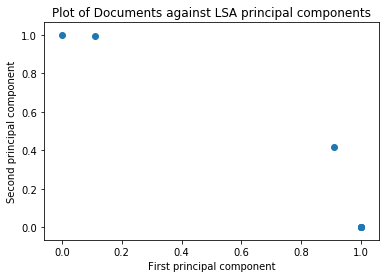

In [30]:
plt.figure()
plt.scatter(xs,ys)
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.title('Plot of Documents against LSA principal components')
plt.show()

Populating the interactive namespace from numpy and matplotlib


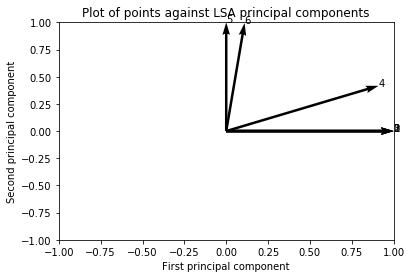

[(0, 'Machine learning is super fun'), (1, 'Python is super super cool'), (2, 'Statistics is cool too'), (3, 'Data science is fun'), (4, 'Python is great for machine learning'), (5, 'I like football'), (6, 'Football is great to watch')]


In [31]:
%pylab inline
plt.figure()
ax = plt.gca()
for pos, vec in enumerate(list(zip(xs, ys))):
    ax.quiver(0,0,vec[0],vec[1],angles='xy',scale_units='xy',scale=1, linewidth = .01)
    ax.annotate('{}'.format(pos),xy=(vec[0], vec[1]),xytext=(vec[0], vec[1]))
ax.set_xlim([-1,1])
ax.set_ylim([-1,1])
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.title('Plot of points against LSA principal components')
plt.draw()
plt.show()
print(list(enumerate(example)))

In [32]:
#Compute document similarity using LSA components
similarity = np.asarray(numpy.asmatrix(dtm_lsa) * numpy.asmatrix(dtm_lsa).T)
pd.DataFrame(similarity,index=example, columns=example)

,Machine learning is super fun,Python is super super cool,Statistics is cool too,Data science is fun,Python is great for machine learning,I like football,Football is great to watch
Machine learning is super fun,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.909239,2.356882e-11,0.109439
Python is super super cool,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.909239,1.886950e-38,0.109439
Statistics is cool too,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.909239,1.886950e-38,0.109439
Data science is fun,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.909239,1.417265e-29,0.109439
Python is great for machine learning,9.092389e-01,9.092389e-01,9.092389e-01,9.092389e-01,1.000000,4.162748e-01,0.513280
I like football,2.356882e-11,1.886950e-38,1.886950e-38,1.417265e-29,0.416275,1.000000e+00,0.993994
Football is great to watch,1.094385e-01,1.094385e-01,1.094385e-01,1.094385e-01,0.513280,9.939936e-01,1.000000
